In [3]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [13]:
taille = 6

def proba_target(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return 0.469
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return 0.469
    else:
        return 0.001

def log_proba_target(spins):
    log_probas = []
    for spin in spins:
        log_probas.append(log_proba_target_single(spin))
    return torch.tensor(log_probas)

def log_proba_target_single(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return np.log(0.469)
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return np.log(0.469)
    else:
        return np.log(0.001)
    
def log_uniform(spins):
    return torch.tensor([np.log(1/64) for i in range(len(spins))])

def proba_exemple2(spin):
    """
    Renvoie une proba plus élevée si la somme des spins est paire. On prend enfin le log de cette distribution.
    """
    if torch.sum(spin) % 2 == 0:
        return np.log(1/48)
    else:
        return np.log(1/96)
    
def proba2_vect(spins):
    """
    Version vectorisée de proba_exemple2
    """
    probas = []
    for spin in spins:
        probas.append(proba_exemple2(spin))
    return torch.tensor(probas)



Epoch 0: 0.46191659174654887
Epoch 100: 0.31401880903021634
Epoch 200: 0.22484055341432616
Epoch 300: 0.16903122462247347
Epoch 400: 0.122098670323468
Epoch 500: 0.0838617989062998
Epoch 600: 0.0699192980131292
Epoch 700: 0.054105328830086605
Epoch 800: 0.0359850556092304
Epoch 900: 0.026312706881587267


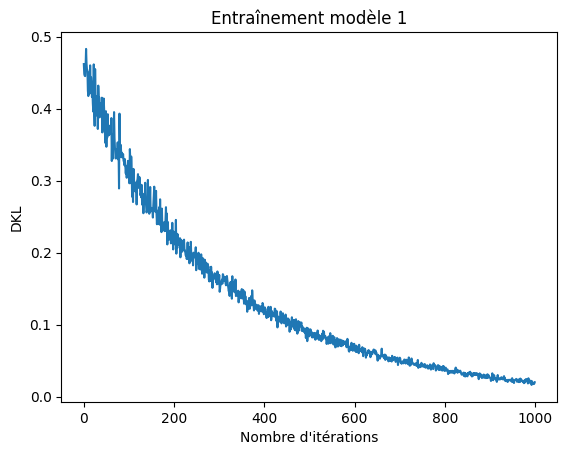

In [14]:
mymodel = VAN(input_size = taille)
loss=train(mymodel, proba2_vect, batch_size=1000,n_iter=1000, lr=1e-3)

plt.plot(loss)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 1')
plt.show()